## Wine Classification

### Imports

In [25]:
import numpy as np
import pandas as pd
import altair as alt
from matplotlib import pyplot as plt
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    cross_val_score,
    train_test_split,
)
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from ucimlrepo import fetch_ucirepo 

## Citations

### data source 
Sources: (a) Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

(b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au (c) July 1991

### UC Irvine repo

If you publish material based on databases obtained from this repository, then, in your acknowledgements, please note the assistance you received by using this repository. This will help others to obtain the same data sets and replicate your experiments. We suggest the following pseudo-APA reference format for referring to this repository:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Here is a BiBTeX citation as well:

@misc{Lichman:2013 ,
author = "M. Lichman",
year = "2013",
title = "{UCI} Machine Learning Repository",
url = "http://archive.ics.uci.edu/ml",
institution = "University of California, Irvine, School of Information and Computer Sciences" }

### Papers 

https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/epdf/10.1002/cem.1173 - Ballabio et al

https://www.nature.com/articles/s41598-023-44111-9.pdf - Jain, K et al

https://www.mdpi.com/2077-0472/13/1/224 - Ohana-Levi, N. et al, 2023

https://www.researchgate.net/profile/Fabio-Orlandi-2/publication/283105803_Phenological_characteristics_of_different_winegrape_cultivars_in_Central_Italy/links/564db7cc08aeafc2aab004cc/Phenological-characteristics-of-different-winegrape-cultivars-in-Central-Italy.pdf - Orlandi, F. et al

# Introduction

With increased globalization, wine is consumed across a wider range of nations making wine trade an important part of the global economy (Orlandi, F. et al, 2015). For example, in 2021 wine exports increased by an average of 15% since 2017 reaching a global total of $40.7 billion (Jain, K. et al, 2023). Italy is one of the top 5 exporters of wine and together these countries contribute to 70.4% of the total wine exported globally (Jain, K. et al, 2023). As wine consumption becomes integrated into more cultures, there is an increased need for faster and efficient methods for wine certification, identication as well as quality evaluation. Our project focuses on one of those, namely, wine identification. 

Identification of the wine cultivar (e.g. 'Chardonnay' and 'Merlot') is an important element of consuming and selling wine (Ohana-Levi, N. et al, 2023). Traditional methods rely heavily on the knowledge and experience of indivdual experts which makes the process inherently subjective and labour-intensive. In this project, we aim to use a machine learning algorithm to identify the cultivar of Italian wines using 13 different physiochemical properties instead. This method takes advantage of the dense knowledge-base that exists about the important physiochemical properties of wine. It then utilizes quantitative measurements corresponding to these properties along with machine learning to systematically identify wine cultivars. Given that the wine industry has carved itself a name in global trade, it is crucial to develop and apply cutting-edge methods that can make these processes more accurate, less labour-intensive and cost-efficient. We think that this data-driven approach could be highly beneficial to the wine industry due to the benefits highlighted above.    

# Methods

## Data

In [3]:
# important data details: https://www.openml.org/search?type=data&sort=runs&id=187&status=active

We are using a multivariate dataset for this project that combines 13 physiochemical properties for 178 Italian wine samples. These samples correspond to 3 distinct cultivars from the same geographical location. The data was originally collected by M.Forina et al (Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.) and contributed to the UC Irvine Machine Learning Repository by Stefan Aeberhard and M. Forina in 1992 (last updated on Aug 28 2023). Details associated with the dataset can be found in the UC Irvine repository (https://archive.ics.uci.edu/dataset/109/wine) and the data can be read directly from here (https://archive.ics.uci.edu/static/public/109/data.csv). Each row of the dataset corresponds to one wine sample and contains measurements corresponding to each of the 13 physiochemical components. Identification and quantification of the different chemical constituents and properties of the wine was based on chromatographic profiles obtained through mass spectrometry(Ballabio, D. et al). This collection and experimentation was performed by Ballabio, D. et al. 

## Analysis 

# Results and Discussion

For our data analysis, we first split the data into train and test sets with an equal distribution of target classes in each set to ensure the model generalizes well. The train-test split was done before any further data analysis and scaling to avoid information leakage. All of the features in the dataset are numerical, so we applied the standard scaler to all of them to ensure they take on the same range of values.

Next we looked at the distribution of values for each numerical feature for each of the three target classes. We can see that the density curves overlap, but still show different shapes and mean values, with some exhitibiting bimodal distributions. The least predictive features look to be Magnesium and Ash as there is significant overlap between the 3 class distributions. We decided to keep all of the features to use in our model, as those features may still be more predictive when combined with other features.

In [2]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 

#Split into train/test with equal distribution of target classes
wine_train, wine_test = train_test_split(
    wine.data.original, train_size=0.70, stratify=wine.data.original['class']
)

#Save split data
wine_train.to_csv("./data/processed/wine_train.csv")
wine_test.to_csv("./data/processed/wine_test.csv")

In [10]:
#Data info
wine_train.info()
wine.variables

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 37 to 88
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       124 non-null    float64
 1   Malicacid                     124 non-null    float64
 2   Ash                           124 non-null    float64
 3   Alcalinity_of_ash             124 non-null    float64
 4   Magnesium                     124 non-null    int64  
 5   Total_phenols                 124 non-null    float64
 6   Flavanoids                    124 non-null    float64
 7   Nonflavanoid_phenols          124 non-null    float64
 8   Proanthocyanins               124 non-null    float64
 9   Color_intensity               124 non-null    float64
 10  Hue                           124 non-null    float64
 11  0D280_0D315_of_diluted_wines  124 non-null    float64
 12  Proline                       124 non-null    int64  
 13  class     

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,None,None,no
1,Alcohol,Feature,Continuous,None,None,None,no
2,Malicacid,Feature,Continuous,None,None,None,no
3,Ash,Feature,Continuous,None,None,None,no
4,Alcalinity_of_ash,Feature,Continuous,None,None,None,no
5,Magnesium,Feature,Integer,None,None,None,no
6,Total_phenols,Feature,Continuous,None,None,None,no
7,Flavanoids,Feature,Continuous,None,None,None,no
8,Nonflavanoid_phenols,Feature,Continuous,None,None,None,no
9,Proanthocyanins,Feature,Continuous,None,None,None,no


In [11]:
cols_to_scale = wine.variables.query('role == "Feature" and type in ["Continuous", "Integer"]')["name"].to_list()
wine_preprocessor = make_column_transformer(
    (StandardScaler(), cols_to_scale),
    remainder='passthrough'
)

wine_preprocessor.fit(wine_train)
wine_preprocessor.set_output(transform='pandas')
scaled_wine_train = wine_preprocessor.transform(wine_train)
scaled_wine_test = wine_preprocessor.transform(wine_test)

#Remove prefix added by column transformer
scaled_wine_train.columns = [col.split('__')[1] for col in scaled_wine_train.columns]
scaled_wine_test.columns = [col.split('__')[1] for col in scaled_wine_test.columns]

scaled_wine_train.to_csv("./data/processed/scaled_wine_train.csv")
scaled_wine_test.to_csv("./data/processed/scaled_wine_test.csv")

In [5]:
#Density plot for each numerical variable. Code adapted from https://github.com/ttimbers/breast_cancer_predictor_py

# melt for plotting via facets 
wine_melted = scaled_wine_train.melt(
    id_vars=['class'],
    var_name='predictor',
    value_name='value'
)
wine_melted

#Plot the distribution of each feature for each class of wine
alt.Chart(wine_melted, width=150, height=100).transform_density(
    'value',
    groupby=['class', 'predictor']
).mark_area(opacity=0.7).encode(
    x=alt.X("value:Q"),
    y=alt.Y('density:Q').stack(False),
    color='class:N'
).facet(
    'predictor:N',
    columns=4
).resolve_scale(
    y='independent'
)

alt.FacetChart(...)

### Create baseline model

In [17]:
X_train = wine_train.drop(columns=['class'])
y_train = wine_train['class']

X_test = wine_test.drop(columns=['class'])
y_test = wine_test['class']

In [18]:
dummy = DummyClassifier(random_state=123)
mean_cv_score = cross_val_score(dummy, X_train, y_train).mean()
print(f"Baseline model achieves {round(mean_cv_score*100,2)}% accuracy")

Baseline model achieves 40.33% accuracy


### Optimize C hyperparameter for logistic regression model

In [37]:
np.random.seed(522)

pipe_lr = make_pipeline(
    StandardScaler(), LogisticRegression(max_iter=2000)
)

param_grid = {
    "logisticregression__C": np.array([0.01,0.1,1,10,100,1000])
}

C_search = GridSearchCV(
    pipe_lr, param_grid, n_jobs=-1, cv=5, return_train_score=True
)
C_search.fit(X_train, y_train)

print("Optimal C value: ", C_search.best_params_)

Optimal C value:  {'logisticregression__C': 0.1}


Text(0, 0.5, 'Accuracy')

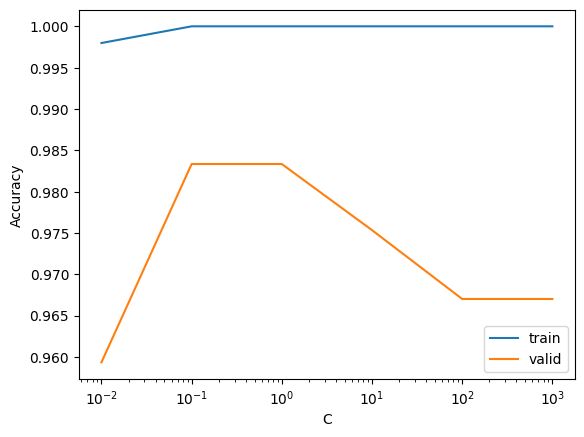

In [38]:
train_scores = C_search.cv_results_["mean_train_score"]
cv_scores = C_search.cv_results_["mean_test_score"]

plt.semilogx(param_grid["logisticregression__C"], train_scores, label="train")
plt.semilogx(param_grid["logisticregression__C"], cv_scores, label="valid")
plt.legend()

plt.xlabel("C")
plt.ylabel("Accuracy")

### Create logistic regression model with optimal hyperparameter

In [39]:
pipe_lr = make_pipeline(
    StandardScaler(), LogisticRegression(max_iter=2000, C=0.1)
)

pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=2000))])

In [41]:
train_score = pipe_lr.score(X_train,y_train)
test_score = pipe_lr.score(X_test,y_test)

print(f"Final LR model training accuracy: {round(train_score*100,2)}%")
print(f"Final LR model test accuracy: {round(test_score*100,2)}%")

Final LR model training accuracy: 100.0%
Final LR model test accuracy: 98.15%
